In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
le_Gdp_DF_Raw=pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")
le_Gdp_DF_Raw.head()

,Entity,Code,Year,Life expectancy,GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.638,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,27.878,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,28.361,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,28.852,1240.0,NaN,7764549.0,NaN


In [8]:
le_Gdp_DF_Raw['Year'].unique()

array([  2015,   1950,   1951,   1952,   1953,   1954,   1955,   1956,
         1957,   1958,   1959,   1960,   1961,   1962,   1963,   1964,
         1965,   1966,   1967,   1968,   1969,   1970,   1971,   1972,
         1973,   1974,   1975,   1976,   1977,   1978,   1979,   1980,
         1981,   1982,   1983,   1984,   1985,   1986,   1987,   1988,
         1989,   1990,   1991,   1992,   1993,   1994,   1995,   1996,
         1997,   1998,   1999,   2000,   2001,   2002,   2003,   2004,
         2005,   2006,   2007,   2008,   2009,   2010,   2011,   2012,
         2013,   2014,   2016,   2017,   2018,   2019, -10000,  -9000,
        -8000,  -7000,  -6000,  -5000,  -4000,  -3000,  -2000,  -1000,
            0,    100,    200,    300,    400,    500,    600,    700,
          800,    900,   1000,   1100,   1200,   1300,   1400,   1500,
         1600,   1700,   1710,   1720,   1730,   1740,   1750,   1760,
         1770,   1780,   1790,   1800,   1801,   1802,   1803,   1804,
      

In [9]:
#(le_Gdp_DF_Raw[(le_Gdp_DF_Raw['Year'] >= 2015) & (le_Gdp_DF_Raw['Year'] <= 2018)]
le_gdp_DF_clean = le_Gdp_DF_Raw.dropna(subset = ['Life expectancy', 'GDP per capita'])
del le_gdp_DF_clean["417485-annotations"], le_gdp_DF_clean["Continent"]

In [10]:
le_gdp_DF_clean['Year'].unique().shape

(310,)

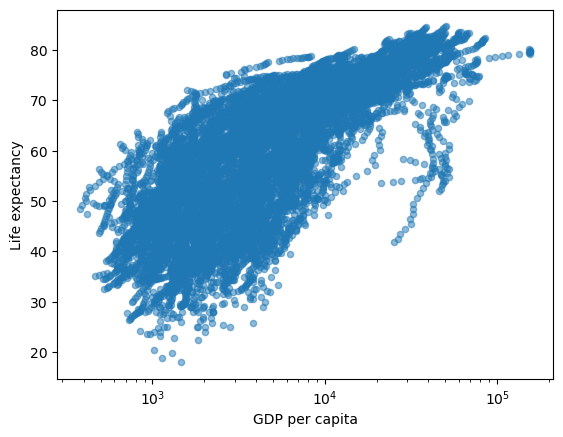

In [11]:
le_gdp_DF_clean.plot.scatter(x='GDP per capita', y='Life expectancy', alpha=0.5)
plt.xscale("log")
plt.show()

In [12]:
# load human development index vs corruption dataset
dfraw = pd.read_csv('human-development-index-vs-corruption-perception-index.csv')

## map continent
try: 
  import pycountry_convert as pc
except:
  !pip install pycountry-convert
  import pycountry_convert as pc

def map_continent(country_name):
  try:
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    continent = pc.convert_continent_code_to_continent_name(country_continent_code)
  except: 
    continent = 'Unmapped'
  return continent

dfraw['Mapped Continent'] = dfraw['Entity'].apply(map_continent)

dfraw.sample(5)

,Entity,Code,Year,Human Development Index (UNDP),Corruption Perception Index - Transparency International (2018),Population (historical estimates),Continent,Mapped Continent
28558,Lithuania,LTU,1812,NaN,NaN,778655.0,NaN,Europe
4754,Belarus,BLR,1996,0.661,NaN,10436455.0,NaN,Europe
18729,Germany,DEU,1955,NaN,NaN,71222632.0,NaN,Europe
1564,Angola,AGO,1896,NaN,NaN,3190277.0,NaN,Africa
43801,Sao Tome and Principe,STP,1936,NaN,NaN,60575.0,NaN,Africa


In [13]:
df = (dfraw
  .dropna(subset = ['Human Development Index (UNDP)', 'Corruption Perception Index - Transparency International (2018)']) # remove row if either of these columns are NaN
  .sort_values(by='Year')
  .drop_duplicates(subset=['Entity'], keep='last')
  # .groupby(['Entity', 'Mapped Continent']).mean()  # merge similar rows
)
del  df['Code'], df['Continent']

# reanme columns
df.rename(columns={
  'Human Development Index (UNDP)': 'Human Development Index',
  'Corruption Perception Index - Transparency International (2018)': 'Corruption Perception Index',
  'Total population (Gapminder, HYDE & UN)': 'Total population'
}, inplace=True)

df

,Entity,Year,Human Development Index,Corruption Perception Index,Population (historical estimates),Mapped Continent
8626,Cameroon,2017,0.556,25.0,24393182.0,Africa
8365,Cambodia,2017,0.582,21.0,15830694.0,Asia
7837,Burkina Faso,2017,0.423,42.0,19835860.0,Africa
35138,Netherlands,2017,0.931,82.0,17207204.0,Europe
52610,Uganda,2017,0.516,26.0,40127096.0,Africa
...,...,...,...,...,...,...
15794,Eswatini,2017,0.588,39.0,1151397.0,Africa
15533,Estonia,2017,0.871,71.0,1317550.0,Europe
49121,Syria,2017,0.536,14.0,18983370.0,Asia
41552,Russia,2017,0.816,29.0,145452544.0,Europe


<AxesSubplot:xlabel='Human Development Index', ylabel='Corruption Perception Index'>

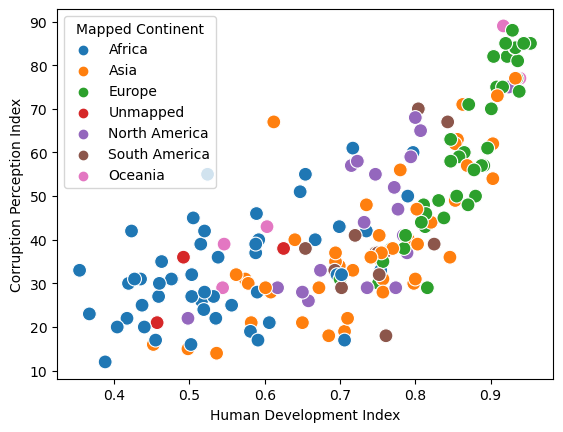

In [14]:
import seaborn as sns
sns.scatterplot(x='Human Development Index', y='Corruption Perception Index', data=df, hue='Mapped Continent', s=100)

In [15]:
df = (dfraw
  .dropna(subset = ['Human Development Index (UNDP)', 'Corruption Perception Index - Transparency International (2018)']) # remove row if either of these columns are NaN
  
      #.sort_values(by='Year')
  #.drop_duplicates(subset=['Entity'], keep='last')
  # .groupby(['Entity', 'Mapped Continent']).mean()  # merge similar rows
)

In [19]:
df.groupby('Entity')[['Year','Human Development Index (UNDP)']].agg('mean')

,Year,Human Development Index (UNDP)
Entity,,
Afghanistan,2014.5,0.490833
Albania,2014.5,0.775667
Algeria,2014.5,0.748000
Angola,2014.5,0.565167
Argentina,2014.5,0.821167
...,...,...
Venezuela,2014.5,0.771667
Vietnam,2014.5,0.681667
Yemen,2014.5,0.485667
